In [1]:
import numpy as np
import matplotlib.pyplot as plt
import camb
import seaborn as sns
sns.set_context('paper',font_scale=1.5)

In [2]:
omega_m0=0.32
omega_b0=0.049
h=0.67
n_s=0.96
sigma_8=0.81
A_s=np.exp(3.044)*1e-10
z=np.arange(0,3+1,1)

In [3]:
def P_lin(m_nu,N_eff):
    omnuh2 = m_nu / 94.07 * (N_eff / 3) ** (3 / 4)

    pars = camb.CAMBparams()
    pars.set_cosmology(
        H0=100 * h,
        ombh2=omega_b0 * h**2,
        omch2=(omega_m0 - omega_b0) * h**2 - omnuh2,
        omk=0,
        num_massive_neutrinos=1,
        mnu=m_nu,
        nnu=N_eff,
    )
    pars.InitPower.set_params(As=A_s,ns=n_s)
    pars.set_matter_power(
        redshifts=z,
        kmax=10,
        k_per_logint=100,
        nonlinear=False,
        accurate_massive_neutrino_transfers=True,
        silent=True
    )
    pars.set_accuracy(
        AccuracyBoost=2, lAccuracyBoost=2
    )

    res = camb.get_results(pars)
    PK = res.get_matter_power_interpolator(
        var1='delta_nonu',
        var2='delta_nonu',
        nonlinear=False,
        hubble_units=True,
        k_hunit=True,
        log_interp=True,
        silent=True,
    )
    k=np.logspace(-4,0,5000)
    pks=PK.P(z,k)
    
    return pks

In [4]:
pks_no=P_lin(0.0,3.044)
pks_base=P_lin(0.06,3.044)
pks_mnu=[]
mass=[0.06,0.10,0.20,0.30]
for mnu in mass:
    pks_mnu.append(P_lin(mnu,3.044))

In [5]:
z=np.array([0.9,1.1])
pks1_mnu=[]
for mnu in mass:
    pks1_mnu.append(P_lin(mnu,3.044))
pks1_no=P_lin(0.0,3.044)

In [6]:
f_mnu=[]
for i,pks1 in enumerate(pks1_mnu):
    partial_p_z = (pks1[-1] - pks1[0]) / 0.2
    f_mnu.append(-(1 + 1) / (2 * pks_mnu[i][1]) * partial_p_z)

In [7]:
partial_p_z = (pks1_no[-1] - pks1_no[0]) / 0.2
f_no = -(1 + 1) / (2 * pks_no[1]) * partial_p_z

In [8]:
palette_mass=sns.color_palette('blend:powderblue,#1F77B4',n_colors=len(mass))
palette_mass

[(0.6901960784313725, 0.8784313725490196, 0.9019607843137255),
 (0.5006535947712418, 0.7411764705882353, 0.8366013071895425),
 (0.3111111111111111, 0.603921568627451, 0.7712418300653595),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)]

In [9]:
z=np.arange(0,3+1,1)
palette_z=sns.color_palette('blend:pink,brown',n_colors=len(z))
palette_z

[(1.0, 0.7529411764705882, 0.796078431372549),
 (0.8823529411764706, 0.5568627450980392, 0.5856209150326797),
 (0.7647058823529412, 0.3607843137254902, 0.37516339869281046),
 (0.6470588235294118, 0.16470588235294117, 0.16470588235294117)]

In [10]:
palette_f=sns.color_palette('blend:palegreen,forestgreen',n_colors=len(mass))
palette_f

[(0.596078431372549, 0.984313725490196, 0.596078431372549),
 (0.4418300653594771, 0.837908496732026, 0.4418300653594771),
 (0.2875816993464052, 0.6915032679738562, 0.2875816993464052),
 (0.13333333333333333, 0.5450980392156862, 0.13333333333333333)]

Text(0.14, 0.9, '$\\Omega_\\mathrm{b,0}h^2,\\Omega_\\mathrm{m,0}h^2,\\Omega_\\mathrm{m,0}$ fixed')

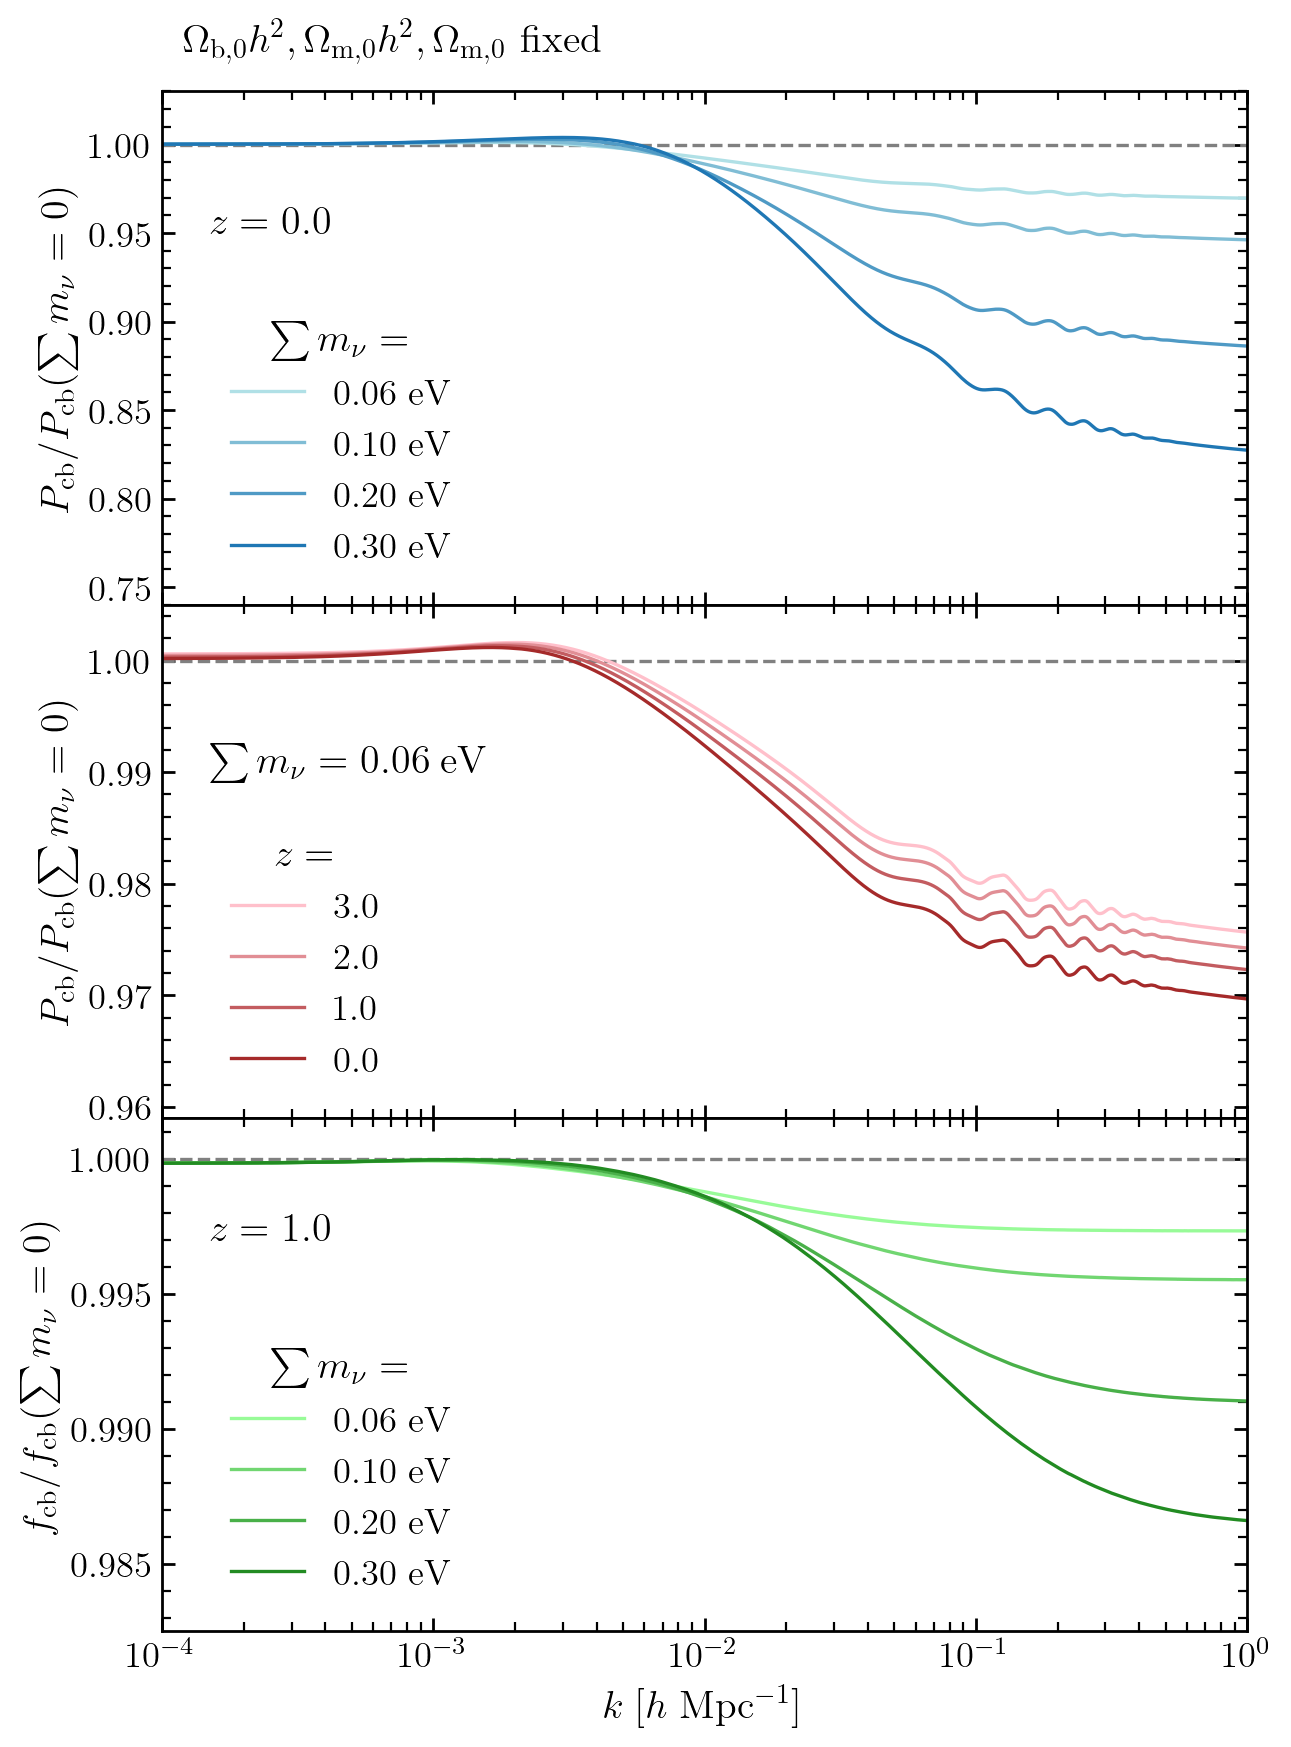

In [15]:
z=np.arange(0,3+1,1)
k=np.logspace(-4,0,5000)
fig,axes=plt.subplots(3,1,sharex=True)
fig.set_dpi(200)
fig.set_size_inches(7,10)
fig.subplots_adjust(hspace=0)
for ax in axes:
    ax.minorticks_on()
    ax.tick_params(which='both',direction='in',top=True,right=True)
    ax.set_xlim(1e-4)
    ax.axhline(1,c='gray',ls='--')
for ax in axes[:2]:
    ax.set_ylabel(r'$P_\mathrm{cb}/P_\mathrm{cb}(\sum m_\nu=0)$')
axes[2].set_ylabel(r'$f_\mathrm{cb}/f_\mathrm{cb}(\sum m_\nu=0)$')
for i in range(len(mass)):
    axes[0].semilogx(k,pks_mnu[i][0,:]/pks_no[0,:],label=f'{mass[i]:.2f} eV',c=palette_mass[i])
lines=[]
for i in range(z.size-1,-1,-1):
    l,=axes[1].semilogx(k,pks_base[i,:]/pks_no[i,:],label=f'{z[i]:.1f}',c=palette_z[z.size-i-1])
lines.reverse()
for i in range(len(mass)):
    axes[2].semilogx(k,f_mnu[i]/f_no,label=f'{mass[i]:.2f} eV',c=palette_f[i])
axes[0].set_ylim(0.74,1.03)
axes[0].text(1.5e-4,0.95,r'$z=0.0$')
axes[1].set_ylim(0.959,1.005)
axes[2].set_ylim(0.9825,1.0015)
axes[2].set_xlabel(r'$k\;[h\;\mathrm{Mpc^{-1}}]$')
axes[1].text(1.5e-4,0.99,r'$\sum m_\nu=0.06\;\mathrm{eV}$')
axes[2].text(1.5e-4,0.997,r'$z=1.0$')
axes[0].legend(loc=(0.05,0.05),frameon=False,title=r'$\sum m_\nu=$')
axes[1].legend(loc=(0.05,0.05),frameon=False,title=r'$z=$')
axes[2].legend(loc=(0.05,0.05),frameon=False,title=r'$\sum m_\nu=$')
fig.text(0.14,0.9,r'$\Omega_\mathrm{b,0}h^2,\Omega_\mathrm{m,0}h^2,\Omega_\mathrm{m,0}$ fixed')

In [16]:
fig.savefig('suppression.pdf',bbox_inches='tight')